<a href="https://colab.research.google.com/github/georgezoto/Coding-in-TensorFlow/blob/master/Cassava-Disease-Classification/Cassava_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Cassava Disease Classification: Helping farmers identify diseased plants
**Meetup event, come and join us 😀**  
https://www.meetup.com/Deep-Learning-Adventures/events/272014852/

**Kaggle Dataset 🎉**  
https://www.kaggle.com/c/cassava-disease/data

**Acknowledgements**  
We thank the different experts and collaborators from NaCRRI for assisting in preparing this dataset

**Citation**  
Please cite this paper if you use the dataset for your project: https://arxiv.org/pdf/1908.02900.pdf


![alt text](https://secure.meetupstatic.com/photos/event/d/a/6/d/highres_491455917.jpeg)

### Mount Google Drive for images and datasets ##

Using Colab, we need to mount our Google Drive in our virtual machine using an authorization code to access our images and train and test datasets.

- https://colab.research.google.com/notebooks/io.ipynb#scrollTo=RWSJpsyKqHjH

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Google drive location where your ```kaggle.json``` API key is located

In [2]:
kaggle_google_drive_path = '/content/gdrive/My Drive/Colab Notebooks/Kaggle'

### This enviromental variable is used by ```kaggle competitions download``` command later


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = kaggle_google_drive_path

### Change the working directory where the kaggle api file is

In [4]:
%cd "$kaggle_google_drive_path/Cassava-Disease-Classification"
%ls

/content/gdrive/My Drive/Colab Notebooks/Kaggle/Cassava-Disease-Classification
Cassava-Disease-Classification-v1.h5  Cassava-Disease-Classification-v3.h5
Cassava-Disease-Classification-v2.h5


### Download our kaggle dataset to google drive

In [5]:
!kaggle competitions download -c cassava-disease

  0% 0.00/645k [00:00<?, ?B/s]
100% 645k/645k [00:00<00:00, 41.3MB/s]
  0% 0.00/83.8k [00:00<?, ?B/s]
100% 83.8k/83.8k [00:00<00:00, 11.7MB/s]
100% 774M/777M [00:09<00:00, 97.9MB/s]
100% 777M/777M [00:09<00:00, 85.9MB/s]
 98% 504M/515M [00:05<00:00, 99.3MB/s]
100% 515M/515M [00:05<00:00, 101MB/s] 
 99% 1.03G/1.04G [00:19<00:00, 78.4MB/s]
100% 1.04G/1.04G [00:19<00:00, 57.2MB/s]


In [6]:
%ls -ltr

total 2592867
-rw------- 1 root root   27855160 Jul 23 21:11 Cassava-Disease-Classification-v1.h5
-rw------- 1 root root  111161432 Jul 23 21:43 Cassava-Disease-Classification-v2.h5
-rw------- 1 root root   41758320 Jul 23 22:50 Cassava-Disease-Classification-v3.h5
-rw------- 1 root root     660788 Jul 24 01:31 random.txt
-rw------- 1 root root      85797 Jul 24 01:31 sample_submission_file.csv
-rw------- 1 root root  814615952 Jul 24 01:31 train.zip
-rw------- 1 root root  539790463 Jul 24 01:31 test.zip
-rw------- 1 root root 1119165181 Jul 24 01:32 extraimages.zip


In [7]:
%pwd

'/content/gdrive/My Drive/Colab Notebooks/Kaggle/Cassava-Disease-Classification'

In [8]:
import os
import zipfile

local_zip = kaggle_google_drive_path+'/Cassava-Disease-Classification/train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = kaggle_google_drive_path+'/Cassava-Disease-Classification/test.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

### Directories of each class in the training dataset

In [9]:
healthy = os.path.join('/tmp/train/healthy')
cbb = os.path.join('/tmp/train/cbb')
cbsd = os.path.join('/tmp/train/cbsd')
cgm = os.path.join('/tmp/train/cgm')
cmd = os.path.join('/tmp/train/cmd')

print('total training healthy images:', len(os.listdir(healthy)))
print('total training cbb images:', len(os.listdir(cbb)))
print('total training cbsd images:', len(os.listdir(cbsd)))
print('total training cgm images:', len(os.listdir(cgm)))
print('total training cmd images:', len(os.listdir(cmd)))

healthy_files = os.listdir(healthy)
print(healthy_files[:10])

cbb_files = os.listdir(cbb)
print(cbb_files[:10])

cbsd_files = os.listdir(cbsd)
print(cbsd_files[:10])

cgm_files = os.listdir(cgm)
print(cgm_files[:10])

cmd_files = os.listdir(cmd)
print(cmd_files[:10])

total training healthy images: 316
total training cbb images: 466
total training cbsd images: 1443
total training cgm images: 773
total training cmd images: 2658
['train-healthy-298.jpg', 'train-healthy-209.jpg', 'train-healthy-286.jpg', 'train-healthy-52.jpg', 'train-healthy-194.jpg', 'train-healthy-200.jpg', 'train-healthy-214.jpg', 'train-healthy-293.jpg', 'train-healthy-281.jpg', 'train-healthy-61.jpg']
['train-cbb-406.jpg', 'train-cbb-413.jpg', 'train-cbb-56.jpg', 'train-cbb-254.jpg', 'train-cbb-276.jpg', 'train-cbb-310.jpg', 'train-cbb-95.jpg', 'train-cbb-54.jpg', 'train-cbb-388.jpg', 'train-cbb-64.jpg']
['train-cbsd-214.jpg', 'train-cbsd-146.jpg', 'train-cbsd-965.jpg', 'train-cbsd-859.jpg', 'train-cbsd-1141.jpg', 'train-cbsd-1304.jpg', 'train-cbsd-266.jpg', 'train-cbsd-1377.jpg', 'train-cbsd-1297.jpg', 'train-cbsd-336.jpg']
['train-cgm-136.jpg', 'train-cgm-465.jpg', 'train-cgm-267.jpg', 'train-cgm-31.jpg', 'train-cgm-522.jpg', 'train-cgm-94.jpg', 'train-cgm-752.jpg', 'train-cgm-

### Plot 2 images from each class

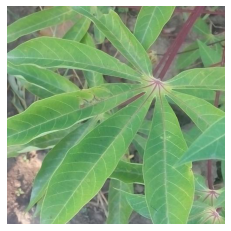

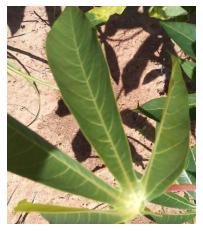

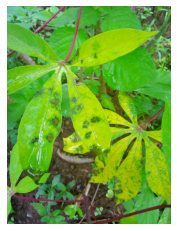

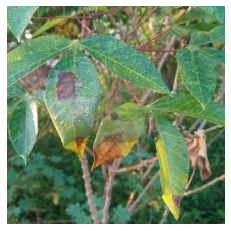

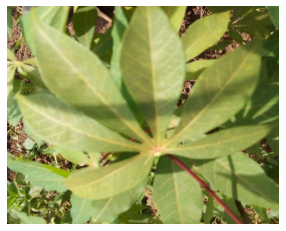

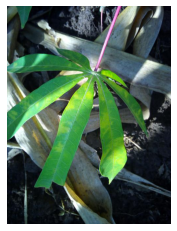

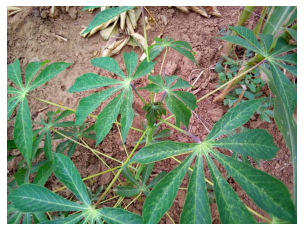

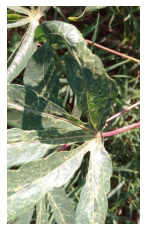

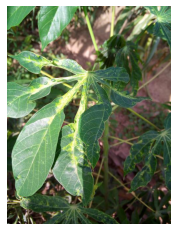

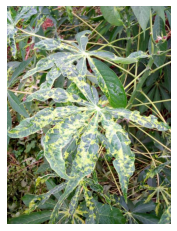

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_healthy = [os.path.join(healthy, fname) 
                for fname in healthy_files[pic_index-2:pic_index]]
next_cbb = [os.path.join(cbb, fname) 
                for fname in cbb_files[pic_index-2:pic_index]]
next_cbsd = [os.path.join(cbsd, fname) 
                for fname in cbsd_files[pic_index-2:pic_index]]
next_cgm = [os.path.join(cgm, fname) 
                for fname in cgm_files[pic_index-2:pic_index]]
next_cmd = [os.path.join(cmd, fname) 
                for fname in cmd_files[pic_index-2:pic_index]]                

for i, img_path in enumerate(next_healthy+next_cbb+next_cbsd+next_cgm+next_cmd):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

### Import tf, keras_preprocessing, ImageDataGenerator

In [11]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

## Cassava-Disease-Classification-v1 3.4M parameters 58% training accuracy

### Our validation/test data have no labels so we can't really use them to see how our model is performing on this dataset

In [18]:
TRAINING_DIR = "/tmp/train/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/tmp/test/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

Found 5656 images belonging to 5 classes.
Found 3774 images belonging to 1 classes.


### Let's define our deep learning model

### Since this is a computer vision task, let's use a Convolutional Neural Network/CNN to detect each class

In [19]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

### Model architecture with tensor shapes as they flow through our network

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

### Let's define our loss function, optimizer and metrics to track

In [21]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### Model training using GPU

In [22]:
history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

Epoch 1/25
20/20 [==============================] - 33s 2s/step - loss: 2.3173 - accuracy: 0.3948 - val_loss: 9.9300 - val_accuracy: 0.0000e+00
Epoch 2/25
20/20 [==============================] - 33s 2s/step - loss: 1.3554 - accuracy: 0.4571 - val_loss: 8.8770 - val_accuracy: 0.0000e+00
Epoch 3/25
20/20 [==============================] - 33s 2s/step - loss: 1.3707 - accuracy: 0.4754 - val_loss: 11.0314 - val_accuracy: 0.0000e+00
Epoch 4/25
20/20 [==============================] - 33s 2s/step - loss: 1.3594 - accuracy: 0.4685 - val_loss: 9.1052 - val_accuracy: 0.0000e+00
Epoch 5/25
20/20 [==============================] - 32s 2s/step - loss: 1.3571 - accuracy: 0.4661 - val_loss: 12.3769 - val_accuracy: 0.0000e+00
Epoch 6/25
20/20 [==============================] - 33s 2s/step - loss: 1.3161 - accuracy: 0.4901 - val_loss: 11.6586 - val_accuracy: 0.0026
Epoch 7/25
20/20 [==============================] - 33s 2s/step - loss: 1.3489 - accuracy: 0.5004 - val_loss: 9.4286 - val_accuracy: 0.02

### Save this model and it's weights and biases

In [24]:
model.save("Cassava-Disease-Classification-v1.h5")

### Plot training accuracy and loss

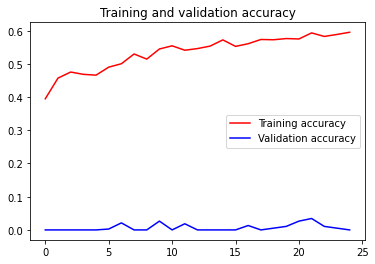

<Figure size 432x288 with 0 Axes>

In [25]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

### Upload and classify your own image

In [26]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Using TensorFlow backend.


Saving train-healthy-0.jpg to train-healthy-0.jpg
Saving train-healthy-1.jpg to train-healthy-1.jpg
Saving train-healthy-2.jpg to train-healthy-2.jpg
Saving train-healthy-3.jpg to train-healthy-3.jpg
Saving train-healthy-4.jpg to train-healthy-4.jpg
train-healthy-0.jpg
[[0. 0. 0. 1. 0.]]
train-healthy-1.jpg
[[0. 0. 0. 1. 0.]]
train-healthy-2.jpg
[[0.00000000e+00 0.00000000e+00 1.16824105e-36 1.00000000e+00
  0.00000000e+00]]
train-healthy-3.jpg
[[0. 1. 0. 0. 0.]]
train-healthy-4.jpg
[[1.7439826e-15 1.0000000e+00 1.1588263e-37 1.0333644e-26 1.3620047e-27]]


## Cassava-Disease-Classification-v2 4xv1 13.8M parameters 58% training accuracy

### Our validation/test data have no labels so we can't really use them to see how our model is performing on this dataset

In [27]:
TRAINING_DIR = "/tmp/train/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)


Found 5656 images belonging to 5 classes.


### New: 2xv1. Let's define our deep learning model

### Since this is a computer vision task, let's use a Convolutional Neural Network/CNN to detect each class

In [28]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

### Model architecture with tensor shapes as they flow through our network

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 128)     3584      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 128)       147584    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 256)       295168    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 256)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 256)      

### Let's define our loss function, optimizer and metrics to track

In [30]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### Model training using GPU

In [31]:
history = model.fit(train_generator, epochs=25, steps_per_epoch=20, verbose = 1)

Epoch 1/25
20/20 [==============================] - 29s 1s/step - loss: 4.4424 - accuracy: 0.4010
Epoch 2/25
20/20 [==============================] - 29s 1s/step - loss: 1.3896 - accuracy: 0.4349
Epoch 3/25
20/20 [==============================] - 28s 1s/step - loss: 1.4466 - accuracy: 0.4413
Epoch 4/25
20/20 [==============================] - 29s 1s/step - loss: 1.3870 - accuracy: 0.4476
Epoch 5/25
20/20 [==============================] - 28s 1s/step - loss: 1.3811 - accuracy: 0.4623
Epoch 6/25
20/20 [==============================] - 29s 1s/step - loss: 1.3781 - accuracy: 0.4806
Epoch 7/25
20/20 [==============================] - 29s 1s/step - loss: 1.3219 - accuracy: 0.4933
Epoch 8/25
20/20 [==============================] - 28s 1s/step - loss: 1.3905 - accuracy: 0.4738
Epoch 9/25
20/20 [==============================] - 28s 1s/step - loss: 1.3113 - accuracy: 0.4940
Epoch 10/25
20/20 [==============================] - 29s 1s/step - loss: 1.2849 - accuracy: 0.5226
Epoch 11/25
20/20 [

### Save this model and it's weights and biases

In [32]:
model.save("Cassava-Disease-Classification-v2.h5")

### Plot training accuracy and loss

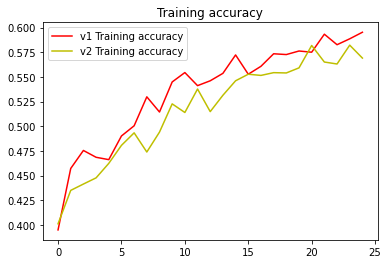

<Figure size 432x288 with 0 Axes>

In [33]:
acc2 = history.history['accuracy']
loss2 = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='v1 Training accuracy')
plt.plot(epochs, acc2, 'y', label='v2 Training accuracy')

plt.title('Training accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

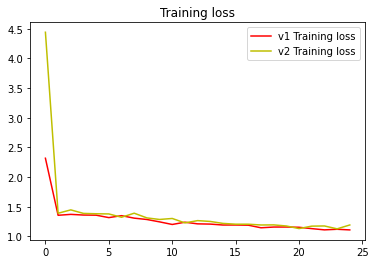

<Figure size 432x288 with 0 Axes>

In [34]:
plt.plot(epochs, loss, 'r', label='v1 Training loss')
plt.plot(epochs, loss2, 'y', label='v2 Training loss')

plt.title('Training loss')
plt.legend(loc=0)
plt.figure()

plt.show()

### Upload and classify your own image

In [35]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving train-healthy-0.jpg to train-healthy-0 (1).jpg
Saving train-healthy-1.jpg to train-healthy-1 (1).jpg
Saving train-healthy-2.jpg to train-healthy-2 (1).jpg
Saving train-healthy-3.jpg to train-healthy-3 (1).jpg
Saving train-healthy-4.jpg to train-healthy-4 (1).jpg
train-healthy-0.jpg
[[0.000000e+00 1.071402e-32 9.999993e-01 7.658993e-07 0.000000e+00]]
train-healthy-1.jpg
[[0.0000000e+00 1.0000000e+00 1.4893795e-18 5.7696870e-13 0.0000000e+00]]
train-healthy-2.jpg
[[0.0000000e+00 2.3652431e-09 9.9742436e-01 2.5756066e-03 5.3044334e-18]]
train-healthy-3.jpg
[[0. 1. 0. 0. 0.]]
train-healthy-4.jpg
[[5.0860248e-35 1.0000000e+00 0.0000000e+00 1.2816126e-38 0.0000000e+00]]


## Cassava-Disease-Classification-v3 1xv1 3.4M parameters 87% training accuracy

### Our validation/test data have no labels so we can't really use them to see how our model is performing on this dataset

In [36]:
TRAINING_DIR = "/tmp/train/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)


Found 5656 images belonging to 5 classes.


### Let's define our deep learning model

### Since this is a computer vision task, let's use a Convolutional Neural Network/CNN to detect each class

In [37]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

### Model architecture with tensor shapes as they flow through our network

In [38]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 128)      

### New: Adam optimizer. Let's define our loss function, optimizer and metrics to track

In [39]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### New: 100 epochs vs 25. Model training using GPU

In [40]:
history = model.fit(train_generator, epochs=100, steps_per_epoch=20, verbose = 1)

Epoch 1/100
20/20 [==============================] - 28s 1s/step - loss: 1.3955 - accuracy: 0.4353
Epoch 2/100
20/20 [==============================] - 28s 1s/step - loss: 1.3259 - accuracy: 0.4762
Epoch 3/100
20/20 [==============================] - 28s 1s/step - loss: 1.3132 - accuracy: 0.4804
Epoch 4/100
20/20 [==============================] - 27s 1s/step - loss: 1.2716 - accuracy: 0.5111
Epoch 5/100
20/20 [==============================] - 27s 1s/step - loss: 1.2102 - accuracy: 0.5563
Epoch 6/100
20/20 [==============================] - 27s 1s/step - loss: 1.1634 - accuracy: 0.5845
Epoch 7/100
20/20 [==============================] - 27s 1s/step - loss: 1.1211 - accuracy: 0.5909
Epoch 8/100
20/20 [==============================] - 27s 1s/step - loss: 1.1559 - accuracy: 0.5734
Epoch 9/100
20/20 [==============================] - 27s 1s/step - loss: 1.1249 - accuracy: 0.5944
Epoch 10/100
20/20 [==============================] - 27s 1s/step - loss: 1.0967 - accuracy: 0.6024
Epoch 11/

### Save this model and it's weights and biases

In [41]:
model.save("Cassava-Disease-Classification-v3.h5")

### Plot training accuracy and loss

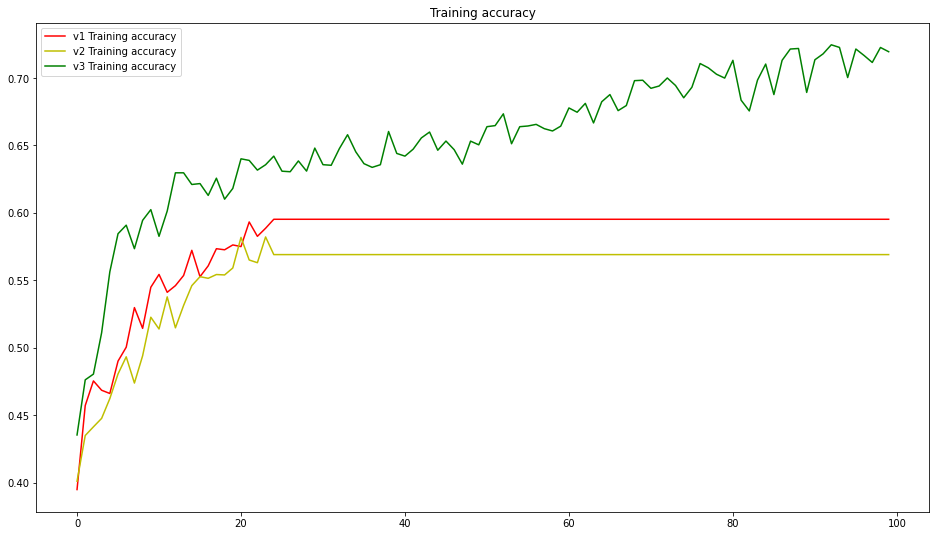

In [63]:
acc3 = history.history['accuracy']
loss3 = history.history['loss']

epochs = range(len(acc3))

plt.figure(figsize=(16, 9))
plt.plot(epochs, acc + [acc[-1]]*(len(acc3) - len(acc)), 'r', label='v1 Training accuracy') #fill shorter list with last value
plt.plot(epochs, acc2 + [acc2[-1]]*(len(acc3) - len(acc2)), 'y', label='v2 Training accuracy') #fill shorter list with last value
plt.plot(epochs, acc3, 'g', label='v3 Training accuracy')

plt.title('Training accuracy')
plt.legend(loc=0)

plt.show()

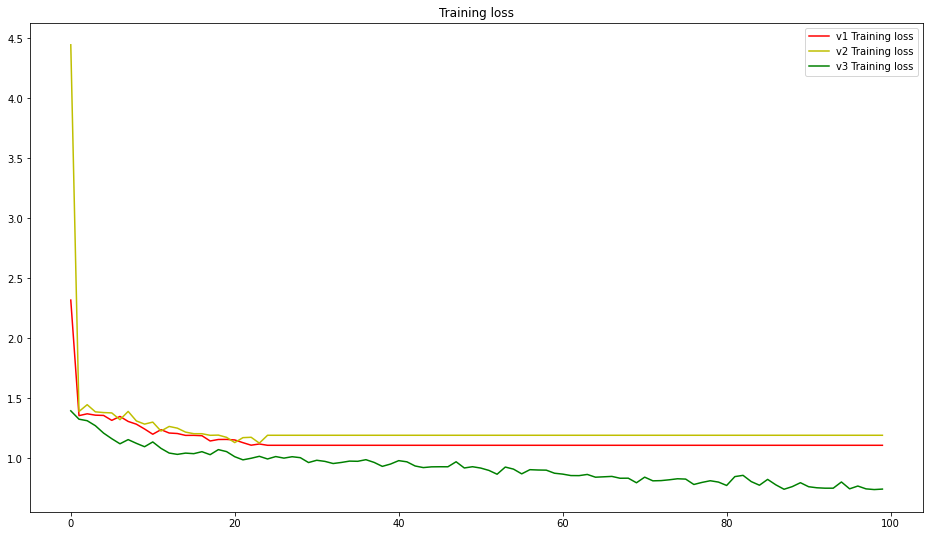

<Figure size 432x288 with 0 Axes>

In [64]:
plt.figure(figsize=(16, 9))
plt.plot(epochs, loss + [loss[-1]]*(len(loss3) - len(loss)), 'r', label='v1 Training loss')
plt.plot(epochs, loss2 + [loss2[-1]]*(len(loss3) - len(loss2)), 'y', label='v2 Training loss')
plt.plot(epochs, loss3, 'g', label='v3 Training loss')

plt.title('Training loss')
plt.legend(loc=0)
plt.figure()

plt.show()

### Upload and classify your own image

In [65]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving train-healthy-0.jpg to train-healthy-0 (2).jpg
Saving train-healthy-1.jpg to train-healthy-1 (2).jpg
Saving train-healthy-2.jpg to train-healthy-2 (2).jpg
Saving train-healthy-3.jpg to train-healthy-3 (2).jpg
Saving train-healthy-4.jpg to train-healthy-4 (2).jpg
train-healthy-0.jpg
[[0. 0. 0. 1. 0.]]
train-healthy-1.jpg
[[0. 0. 0. 1. 0.]]
train-healthy-2.jpg
[[0. 0. 1. 0. 0.]]
train-healthy-3.jpg
[[0.         0.99396485 0.00603518 0.         0.        ]]
train-healthy-4.jpg
[[0.000000e+00 1.000000e+00 0.000000e+00 5.750063e-29 0.000000e+00]]


In [ ]:
300x300

In [ ]:
MobileNet or other image models